# [Machine Learning] Supervised Learning
## Machine Learning Model Steps
- Step 1: Prepare Data
- Step 2: Model (algorithm)
- Step 3: Training (fit())
- Step 4: Test Data
- Step 5: Predict

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Mean Absolute Error (MAE)

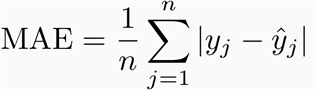

In [2]:
from IPython.display import Image
Image("./DATA INPUT/image_mae.png")

- y: vector of n true value
- y^: vector of n predict value 
- MSE => 0 is best of value predict

In [3]:
x_mae = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y_mae = np.array([30,35,40,44,48,60,66,70,75])
lr = LinearRegression()
lr.fit(x_mae, y_mae)
y_mae_p = lr.predict(x_mae)
mae = mean_absolute_error(y_mae,y_mae_p)

In [4]:
mae

1.5296296296296292

## Mean Squared Error (MSE)

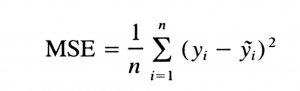

In [5]:
from IPython.display import Image
Image("./DATA INPUT/imager_8598.jpeg")

In [6]:
# Example way 1:
y = np.array([5,11,14,20,23,26])
y_predict = np.array([6,13,15,18,20,28])
# error
print('y-y^ is: ',  y_predict-y)
# squared of error
print('Squared of (y-y^): ',(y_predict-y)*(y_predict-y))
# MSE
print('MSE:', sum((y_predict-y)*(y_predict-y))/len(y))

y-y^ is:  [ 1  2  1 -2 -3  2]
Squared of (y-y^):  [1 4 1 4 9 4]
MSE: 3.8333333333333335


In [7]:
# Example ways 2:
x_mse = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y_mse = np.array([30,35,40,44,48,60,66,70,75])
lr = LinearRegression()
lr.fit(x_mse, y_mse)
y_mse_p = lr.predict(x_mse)
mse = mean_squared_error(y_mse, y_mse_p)

In [8]:
mse

3.6870370370370367

## Root Mean Squared Error (RMSE)

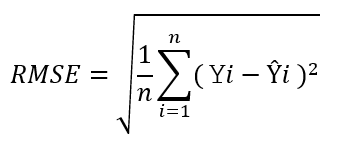

In [9]:
from IPython.display import Image
Image("./DATA INPUT/image_rmse.png")

In [10]:
rmse = np.sqrt(mse)
rmse

1.9201658878953758

## R - Squared

## $$ R - Squared= \frac{\sum_{k=1}^{n}(Y_P - Y_m)^2}{\sum_{k=1}^{n}(Y_k - Y_m)^2}$$
- R-Squared => 1 is best of value predict

In [11]:
x_rsq = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y_rsq = np.array([30,35,40,44,48,60,66,70,75])
lr = LinearRegression()
lr.fit(x_rsq, y_rsq)
y_rsq_p = lr.predict(x_rsq)
r_quared = r2_score(y_rsq, y_rsq_p)

In [12]:
r_quared

0.9842733017377567

# Linear Regression

## Linear Regression $(y = ax + b)$

### $y = \beta_0 +\beta_1x_1 + \beta_2x_2 +...\beta_nx_n$ 

### Correlation

In [13]:
col1 = np.array([2,3,4,5,6,7,8,9,10])
col2 = np.array([30,35,40,44,48,60,66,70,75])
df = pd.DataFrame(data=[col1, col2]).T

In [14]:
df = df.rename(columns={0:'time_stu', 1:'point'})
df.head()

,time_stu,point
0,2,30
1,3,35
2,4,40
3,5,44
4,6,48


In [15]:
# corr()
df.corr()

,time_stu,point
time_stu,1.000000,0.992105
point,0.992105,1.000000


### Coefficient And Intercept
- in $y = ax + b$
- a = coefficient
- b = intercept

In [16]:
# Step 1: Prepare Data
df.head()
x = df.time_stu.values.reshape(9,1)
y = df.point.values

In [17]:
x

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [18]:
y

array([30, 35, 40, 44, 48, 60, 66, 70, 75])

In [19]:
# Steps 2: Model (Algorithrm)
lr = LinearRegression()

In [20]:
# Steps 3: training fit()
lr.fit(x,y)

LinearRegression()

In [21]:
a = lr.coef_
a

array([5.88333333])

In [22]:
b = lr.intercept_
b

16.69999999999999

$ => y = 5.88*x + 16.99 $

In [23]:
# Steps 4: Test Data
yp = lr.predict(x)
yp.round(1)

array([28.5, 34.3, 40.2, 46.1, 52. , 57.9, 63.8, 69.6, 75.5])

In [24]:
y

array([30, 35, 40, 44, 48, 60, 66, 70, 75])

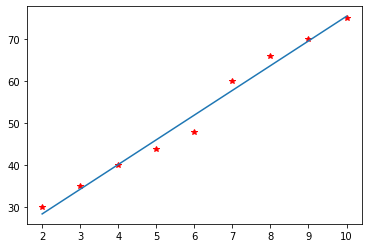

In [25]:
plt.plot(x,y, 'r*')
plt.plot(x,yp)

In [26]:
# Steps 5: Predict
lr.predict([[18]])

array([122.6])

## Linear Regression ($y = a1.x1 + a2.x2 + ...an.xn + b$)

In [27]:
foc = np.array([5,4,2,4,2,3,5,2,1])
age = np.array([20,25,40,30,20,30,30,50,15])
how_learn = np.array([1,2,4,3,2,2,1,3,2])
df2 = pd.DataFrame([foc,age,how_learn]).T

In [28]:
df2.rename(columns={0:'focus', 1:'age', 2:'how_learn'})

,focus,age,how_learn
0,5,20,1
1,4,25,2
2,2,40,4
3,4,30,3
4,2,20,2
5,3,30,2
6,5,30,1
7,2,50,3
8,1,15,2


In [29]:
df2 = df2.rename(columns={0:'focus', 1:'age', 2:'how_learn'})
df2

,focus,age,how_learn
0,5,20,1
1,4,25,2
2,2,40,4
3,4,30,3
4,2,20,2
5,3,30,2
6,5,30,1
7,2,50,3
8,1,15,2


In [30]:
dt = pd.concat([df,df2], axis=1)
dt

,time_stu,point,focus,age,how_learn
0,2,30,5,20,1
1,3,35,4,25,2
2,4,40,2,40,4
3,5,44,4,30,3
4,6,48,2,20,2
5,7,60,3,30,2
6,8,66,5,30,1
7,9,70,2,50,3
8,10,75,1,15,2


In [31]:
# Step 1: Prepare Data
x_ = np.array(dt.iloc[:,2:].values)
x_time = np.array(dt.iloc[:,0].values).reshape(9,1)
x1 = np.concatenate((x_,x_time), axis=1)
y1 = np.array(dt.point)

In [32]:
x1

array([[ 5, 20,  1,  2],
       [ 4, 25,  2,  3],
       [ 2, 40,  4,  4],
       [ 4, 30,  3,  5],
       [ 2, 20,  2,  6],
       [ 3, 30,  2,  7],
       [ 5, 30,  1,  8],
       [ 2, 50,  3,  9],
       [ 1, 15,  2, 10]])

In [33]:
y1

array([30, 35, 40, 44, 48, 60, 66, 70, 75])

In [34]:
# Steps 2: Model
lr1 = LinearRegression()

In [35]:
# Steps 3: Training
lr1.fit(x1,y1)

LinearRegression()

In [36]:
# Steps 4: Test data
yp = lr1.predict(x1)
yp.round(1)

array([29.6, 34.4, 38.8, 45.3, 51. , 58.3, 66. , 70.8, 73.7])

In [37]:
y1

array([30, 35, 40, 44, 48, 60, 66, 70, 75])

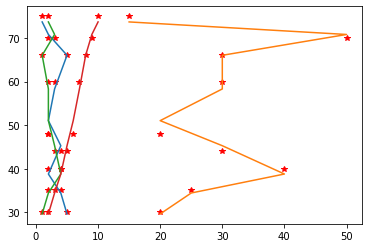

In [38]:
plt.plot(x1,y1, 'r*');
plt.plot(x1,yp);

In [39]:
# Steps 5: Predict
lr1.predict([[2,40,3,8]])

array([63.72643172])

 ## Non- Linear Regression $(y = ax^3 + bx^2 + cx + d)$

## Polynominal Regression $(y = ax^4 + bx^3 + cx^2 + dx + m)$

In [40]:
x = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y = np.array([30,35,40,44,48,60,66,70,75])
lr = LinearRegression()
model = make_pipeline(PolynomialFeatures(2), lr)
model.fit(x, y)
y_predict = model.predict(x)

R-Squared is:  0.9859489957120289


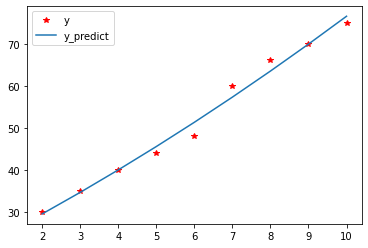

In [41]:
# distance between y and y_predict
r_sqr = r2_score(y,y_predict)
print('R-Squared is: ' ,r_sqr)
plt.plot(x, y, 'r*', label='y');
plt.plot(x,y_predict, label='y_predict');
plt.legend();

# Training And Testing Data | Underfit And Overfit

In [42]:
x = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y = np.array([30,35,40,44,48,60,66,70,75])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
lr = LinearRegression()
model2 = make_pipeline(PolynomialFeatures(4),lr)

In [43]:
x_train

array([[ 7],
       [ 2],
       [10],
       [ 4],
       [ 6],
       [ 5],
       [ 8]])

In [44]:
y_train

array([60, 30, 75, 40, 48, 44, 66])

In [45]:
x_test

array([[9],
       [3]])

In [46]:
y_test

array([70, 35])

In [47]:
# training
model2.fit(x_train, y_train)
y_train_pre = model2.predict(x_train)
r_train = r2_score(y_train, y_train_pre)

In [48]:
y_train_pre

array([57.87940729, 30.03864445, 74.92379851, 39.80134068, 49.69006669,
       43.71694231, 66.94980007])

In [49]:
# testing
model2.fit(x_test, y_test)
y_test_pre = model2.predict(x_test)
r_test = r2_score(y_test, y_test_pre)

In [50]:
y_test_pre

array([70., 35.])

Training R-Squared is:  0.9944001027054599


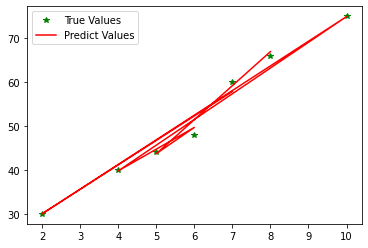

In [51]:
print('Training R-Squared is: ', r_train)
plt.plot(x_train, y_train, 'g*', label='True Values');
plt.plot(x_train, y_train_pre, 'r', label='Predict Values');
plt.legend();

Testing R-Squared is:  1.0


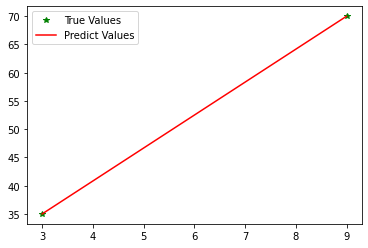

In [52]:
print('Testing R-Squared is: ', r_test)
plt.plot(x_test, y_test, 'g*', label='True Values');
plt.plot(x_test, y_test_pre, 'r', label='Predict Values');
plt.legend();